## 2.2 Softmax回归
同样Softmax回归适用于解决多分类任务，常见的多分类任务有：
* 某个电子邮件是否属于垃圾邮件文件夹？
* 某个用户可能注册或不注册订阅服务？
* 某个图像描绘的是驴、狗、猫、还是鸡？
* 某人接下来最有可能看哪部电影？

我们在[Part1](../../../Part1%20Machine%20Learning%20Basics/2%20LogisticRegression&Softmax/README.md)也有所介绍，这里我们对其理论部分不再做过多介绍。

这里，我们重点对其理论体系进行一些扩展，并且实践Softmax回归的主要流程。

### 2.2.1 网络架构与损失函数

#### 网络架构
与2.1中所说的类似，同样对Softmax回归看成是一个单层神经网络的，其输出层同样为全连接层（FCN）。如下图所示，可以看到是多个输出（每个输出代表一个类别）：
![](https://s2.loli.net/2022/01/15/mDefkdzEqWwBpVs.png)


为了更简洁地表达模型，我们仍然使用线性代数符号。通过向量形式表达为$\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$，这是一种更适合数学和编写代码的形式。
由此，我们已经将所有权重放到一个$3 \times 4$矩阵中。对于给定数据样本的特征$\mathbf{x}$，我们的输出是由权重与输入特征进行矩阵-向量乘法再加上偏置$\mathbf{b}$得到的。

与在[Part1](../../../Part1%20Machine%20Learning%20Basics/2%20LogisticRegression&Softmax/README.md)中讲解的公式一样，softmax函数将未规范化的预测变换为非负并且总和为1，同时要求模型保持可导。我们首先对每个未规范化的预测求幂，这样可以确保输出非负。为了确保最终输出的总和为1，我们再对每个求幂后的结果除以它们的总和。如下式：
$$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{其中}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$$

这里，对于所有的$j$总有$0 \leq \hat{y}_j \leq 1$。因此，$\hat{\mathbf{y}}$可以视为一个正确的概率分布。softmax运算不会改变未规范化的预测$\mathbf{o}$之间的顺序，只会确定分配给每个类别的概率。因此，在预测过程中，我们仍然可以用下式来选择最有可能的类别:
$$
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j.
$$

#### 损失函数
接下来我们详细分析一下其损失函数的由来。这里我们采用极大似然估计的方式进行分析，与[2.1](../2.1%20线性回归/linear_regression.ipynb)的模型类似。

##### 对数似然
softmax函数给出了一个向量$\hat{\mathbf{y}}$，我们可以将其视为“对给定任意输入$\mathbf{x}$的每个类的条件概率”。
* 例如，$\hat{y}_1$=$P(y=\text{猫} \mid \mathbf{x})$
    * 假设整个数据集$\{\mathbf{X}, \mathbf{Y}\}$具有$n$个样本
    * 其中索引$i$的样本由特征向量$\mathbf{x}^{(i)}$和独热标签向量$\mathbf{y}^{(i)}$组成

我们可以将估计值与实际值进行比较：
$$
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)}).
$$

根据最大似然估计，我们最大化$P(\mathbf{Y} \mid \mathbf{X})$，相当于最小化负对数似然：

$$
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)}),
$$

其中，对于任何标签$\mathbf{y}$和模型预测$\hat{\mathbf{y}}$，损失函数为：
$$ l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j. $$

##### softmax求导过程

$$
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}
$$

考虑相对于任何未规范化的预测$o_j$的导数，得到：
$$
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j.
$$

由此可见，导数是我们softmax模型分配的概率与实际发生的情况（由独热标签向量表示）之间的差异。从这个意义上讲，这与我们在回归中看到的非常相似，其中梯度是观测值$y$和估计值$\hat{y}$之间的差异。这不是巧合，在任何指数族分布模型中，对数似然的梯度正是由此得出的。这使梯度计算在实践中变得容易很多。

在训练softmax回归模型后，给出任何样本特征，我们可以预测每个输出类别的概率。通常我们使用预测概率最高的类别作为输出类别。
* 如果预测与实际类别（标签）一致，则预测是正确的。
* 在接下来的实践中，我们将使用*精度*（accuracy）来评估模型的性能。
* 精度等于正确预测数与预测总数之间的比值。

### 2.2.2 图像分类数据集构建
我们使用类似于MNIST但更复杂的**Fashion-MNIST数据集**，其主要不同点在包含了一些非数字的图片。

In [59]:
%matplotlib inline
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt

1. 读取数据集
* 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
* 并除以255使得所有像素的数值均在0到1之间

In [60]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../../../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../../../data", train=False, transform=trans, download=True)

Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。

In [61]:
len(mnist_train), len(mnist_train)

(60000, 60000)

每个输入图像的高度和宽度均为28像素。数据集由灰度图像组成，其通道数为1。为了简洁起见，本书将高度$h$像素、宽度$w$像素图像的形状记为$h \times w$或（$h$,$w$）。

In [62]:
mnist_train[0][0].shape

torch.Size([1, 28, 28])

2. 可视化数据集
* Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。
* 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [63]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

* 现在可以创建一个函数来可视化这些样本。

In [64]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

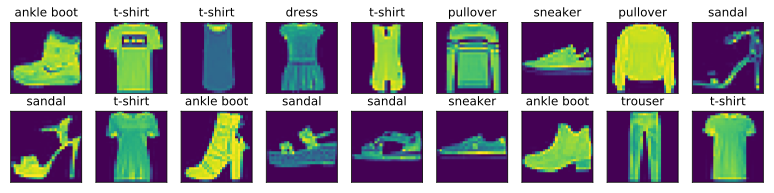

In [65]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

### 2.2.3 Pytorch实现Softmax回归
> 为了演示方便我们使用d2l库

In [66]:
# !pip install d2l  安装d2l库

In [67]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

1. 初始化模型参数
* softmax回归的输出层是一个全连接层。因此，为了实现我们的模型，我们只需在`Sequential`中添加一个带有10个输出的全连接层。
* 我们仍然以均值0和标准差0.01随机初始化参数权重。

In [68]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

#### 梯度消失（爆炸）

在前面的例子中，我们计算了模型的输出，然后将此输出送入交叉熵损失。从数学上讲，这是一件完全合理的事情。然而，从计算角度来看，指数可能会造成数值稳定性问题。回想一下，softmax函数$\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$，其中$\hat y_j$是预测的概率分布。$o_j$是未规范化的预测$\mathbf{o}$的第$j$个元素。如果$o_k$中的一些数值非常大，那么$\exp(o_k)$可能大于数据类型容许的最大数字，即*上溢*（overflow）。这将使分母或分子变为`inf`（无穷大），最后得到的是0、`inf`或`nan`（不是数字）的$\hat y_j$。在这些情况下，我们无法得到一个明确定义的交叉熵值。解决这个问题的一个技巧是：在继续softmax计算之前，先从所有$o_k$中减去$\max(o_k)$。你可以看到每个$o_k$按常数进行的移动不会改变softmax的返回值：
$$
\begin{aligned}
\hat y_j & =  \frac{\exp(o_j - \max(o_k))\exp(\max(o_k))}{\sum_k \exp(o_k - \max(o_k))\exp(\max(o_k))} \\
& = \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}.
\end{aligned}
$$

在减法和规范化步骤之后，可能有些$o_j - \max(o_k)$具有较大的负值。由于精度受限，$\exp(o_j - \max(o_k))$将有接近零的值，即*下溢*（underflow）。这些值可能会四舍五入为零，使$\hat y_j$为零，并且使得$\log(\hat y_j)$的值为`-inf`。反向传播几步后，我们可能会发现自己面对一屏幕可怕的`nan`结果。

尽管我们要计算指数函数，但我们最终在计算交叉熵损失时会取它们的对数。通过将softmax和交叉熵结合在一起，可以避免反向传播过程中可能会困扰我们的数值稳定性问题。如下面的等式所示，我们避免计算$\exp(o_j - \max(o_k))$，而可以直接使用$o_j - \max(o_k)$，因为$\log(\exp(\cdot))$被抵消了。

$$
\begin{aligned}
\log{(\hat y_j)} & = \log\left( \frac{\exp(o_j - \max(o_k))}{\sum_k \exp(o_k - \max(o_k))}\right) \\
& = \log{(\exp(o_j - \max(o_k)))}-\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)} \\
& = o_j - \max(o_k) -\log{\left( \sum_k \exp(o_k - \max(o_k)) \right)}.
\end{aligned}
$$

我们也希望保留传统的softmax函数，以备我们需要评估通过模型输出的概率。但是，我们没有将softmax概率传递到损失函数中，而是**在交叉熵损失函数中传递未规范化的预测，并同时计算softmax及其对数**，这是一种类似于[LogSumExp技巧](https://zhuanlan.zhihu.com/p/153535799)的方法。

2. 损失函数

In [69]:
loss = nn.CrossEntropyLoss()

3. 优化算法

In [70]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

4. 训练

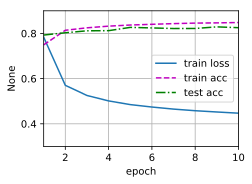

In [71]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)